In [4]:
!pip install mplfinance


     |████████████████████████████████| 70 kB 3.2 MB/s 


In [5]:
pip install arch

     |████████████████████████████████| 902 kB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 42.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


#MODULES

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import math
#For the LSTM task
from sklearn.preprocessing import MinMaxScaler
from arch import arch_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('ETH-USD.csv')
df = df.reset_index()

df.head(3)


In [ ]:
'''
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
df["Date"] = df["Date"].apply(mdates.date2num)
ohlc= df[['Date', 'Open', 'High', 'Low','Close']].copy()
f1, ax = plt.subplots(figsize = (16,6))
# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Saving image
plt.show()
'''

#GARCH

$$\sigma^2(t) = \alpha \times \sigma^2(t-1) + \beta \times e^2(t-1) + w$$

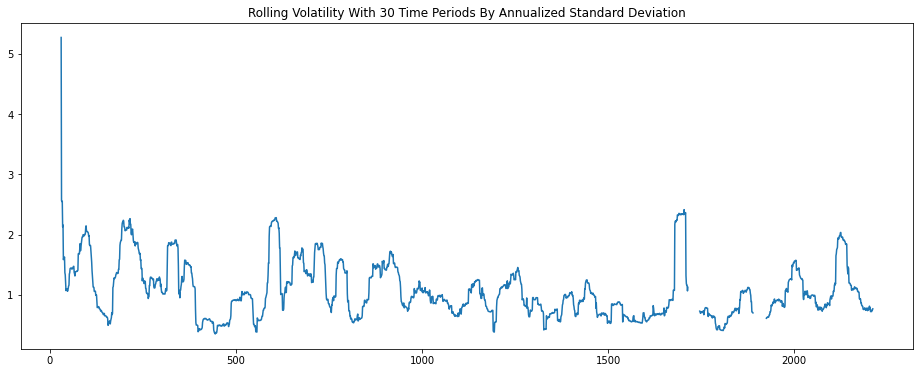

Iteration:      1,   Func. Count:      7,   Neg. LLF: 553.48141764414
Iteration:      2,   Func. Count:     23,   Neg. LLF: 354.0734700208504
Iteration:      3,   Func. Count:     31,   Neg. LLF: 244.77297552318572
Iteration:      4,   Func. Count:     40,   Neg. LLF: 233.09825512115617
Iteration:      5,   Func. Count:     48,   Neg. LLF: 207.6902109418321
Iteration:      6,   Func. Count:     57,   Neg. LLF: 192.98158484357126
Iteration:      7,   Func. Count:     65,   Neg. LLF: 172.50929901571425
Iteration:      8,   Func. Count:     73,   Neg. LLF: 126.9951773091671
Iteration:      9,   Func. Count:     81,   Neg. LLF: 119.01725407552641
Iteration:     10,   Func. Count:     88,   Neg. LLF: 79.50510337765718
Iteration:     11,   Func. Count:     96,   Neg. LLF: 75.63281389457262
Iteration:     12,   Func. Count:    104,   Neg. LLF: 67.95350919566175
Iteration:     13,   Func. Count:    111,   Neg. LLF: 64.64629295704745
Iteration:     14,   Func. Count:    118,   Neg. LLF: 63.8859

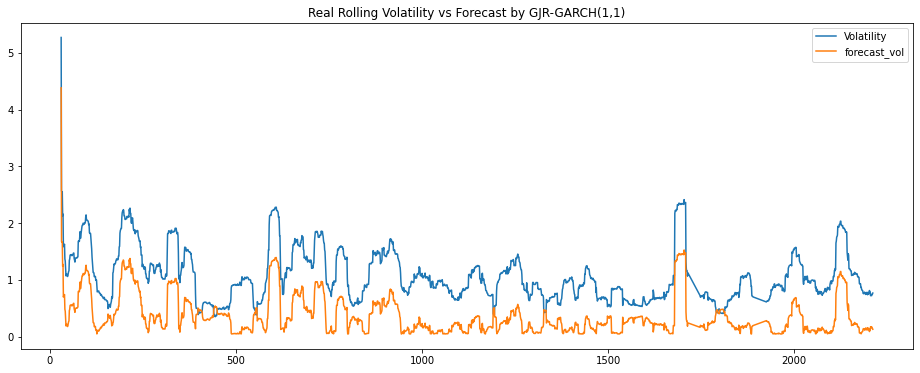

(2116, 12)

Root Mean Squared Error of the GARCH(1,1) model is calculated as  0.7367336018740627


In [9]:

df = df.drop(["Date"], axis=1)

df['log_price'] = np.log(df['Close']) #Firstly we should take the logarithmic return from prices
df['pct_change'] = df['log_price'].diff() #after that let's take difference
df['stdev'] = df['pct_change'].rolling(window=30, center=False).std()
df['Volatility'] = df['stdev'] * (365**0.5) # Annualize.

plt.figure(figsize=(16,6))
df['Volatility'].plot()
plt.title("Rolling Volatility With 30 Time Periods By Annualized Standard Deviation")
plt.show()



df = df.dropna()



vol = df["Volatility"] #* 100


am = arch_model(vol, vol='Garch', p=1, o=1, q=1, dist='Normal')


res1 = am.fit()
res1.summary()

df1 = pd.DataFrame(columns=['test', 'I'])

df1['test'] = res1.resid 
df1.loc[df1['test'] < 0, 'I'] = 1
df1["I"] = df1["I"].fillna(0)

df['forecast_vol'] = np.sqrt(res1.params['omega'] + res1.params['alpha[1]'] * res1.resid**2 + res1.params['gamma[1]'] * res1.resid**2 * df1['I'] + res1.conditional_volatility**2 * res1.params['beta[1]'] ) ## Scaled from 0.1 to 0.01 when *3 then rmse minimum 0.49788 else 0.619080



plt.figure(figsize=(16,6))
df["Volatility"].plot()
df["forecast_vol"].plot()
plt.title("Real Rolling Volatility vs Forecast by GJR-GARCH(1,1)")
plt.legend()
plt.show()

df.shape



 $$\sum{\sqrt{(\hat{X_i}-X_i)^2}}$$

In [ ]:
def rmse_tr(predictions, targets): return np.sqrt(((predictions - targets) ** 2).mean())
skor = rmse_tr(df.loc[df.index[300:], 'forecast_vol'], df.loc[df.index[300:], 'Volatility'])
print("Root Mean Squared Error of the GARCH(1,1) model is calculated as ",skor)


In [15]:
def mse_tr(predictions, targets): return ((predictions - targets) ** 2).mean()
mse_garch = mse_tr(df.loc[df.index[300:], 'forecast_vol'], df.loc[df.index[300:], 'Volatility'])
print('MSE of GARCH is ', mse_garch)


MSE of GARCH is  0.5427764001303299


#LSTM

Epoch 1/20
57/57 [==============================] - 30s 389ms/step - loss: 0.3215
Epoch 2/20
57/57 [==============================] - 22s 391ms/step - loss: 0.1699
Epoch 3/20
57/57 [==============================] - 23s 401ms/step - loss: 0.1136
Epoch 4/20
57/57 [==============================] - 23s 395ms/step - loss: 0.0886
Epoch 5/20
57/57 [==============================] - 23s 408ms/step - loss: 0.0678
Epoch 6/20
57/57 [==============================] - 22s 390ms/step - loss: 0.0544
Epoch 7/20
57/57 [==============================] - 23s 401ms/step - loss: 0.0539
Epoch 8/20
57/57 [==============================] - 24s 429ms/step - loss: 0.0520
Epoch 9/20
57/57 [==============================] - 22s 392ms/step - loss: 0.0452
Epoch 10/20
57/57 [==============================] - 23s 397ms/step - loss: 0.0457
Epoch 11/20
57/57 [==============================] - 23s 408ms/step - loss: 0.0429
Epoch 12/20
57/57 [==============================] - 22s 393ms/step - loss: 0.0431
Epoch 13/20
5

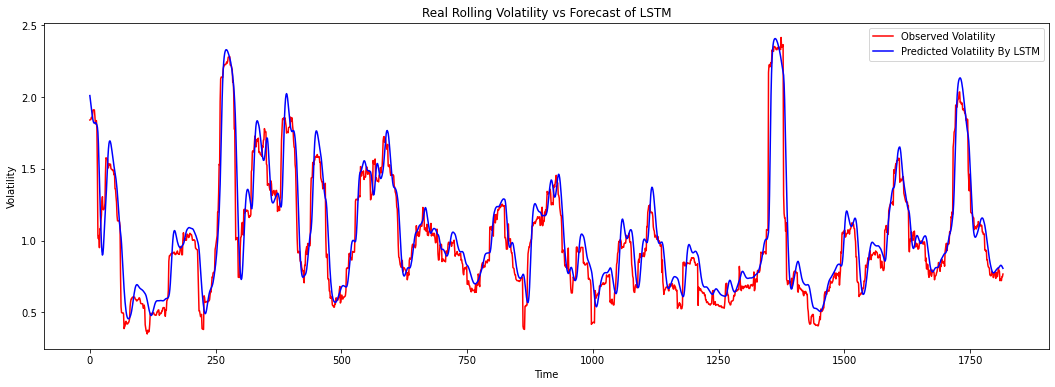

Root Mean Squared Error of the model is calculated as  0.5799988308452648


In [10]:

training_set = df.iloc[:, 10:11].values
# Create a data structure with 100 timestep and 1 output
X_train = []
y_train = []
for i in range(300, df.shape[0]):
    X_train.append(training_set[i-300:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

regressor.summary()


regressor.save('my_modelp1.h5')
 

from keras.models import load_model
regressor = load_model('my_modelp1.h5')


predicted_stock_price = regressor.predict(X_train)

# Visualising the results
plt.figure(figsize=(18,6))
plt.plot(df.iloc[300:, 10:11].values, color = 'red', label = 'Observed Volatility')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Volatility By LSTM')
plt.title('Real Rolling Volatility vs Forecast of LSTM')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()



skor2 = rmse_tr(predicted_stock_price, np.array(df.loc[df.index[300:], 'Volatility']))
print("Root Mean Squared Error of the model is calculated as ",skor2)


#GARCH+LSTM

Epoch 1/20
57/57 [==============================] - 31s 400ms/step - loss: 0.4119
Epoch 2/20
57/57 [==============================] - 22s 393ms/step - loss: 0.1324
Epoch 3/20
57/57 [==============================] - 22s 389ms/step - loss: 0.0924
Epoch 4/20
57/57 [==============================] - 22s 394ms/step - loss: 0.0722
Epoch 5/20
57/57 [==============================] - 22s 387ms/step - loss: 0.0650
Epoch 6/20
57/57 [==============================] - 22s 394ms/step - loss: 0.0534
Epoch 7/20
57/57 [==============================] - 23s 402ms/step - loss: 0.0504
Epoch 8/20
57/57 [==============================] - 23s 398ms/step - loss: 0.0530
Epoch 9/20
57/57 [==============================] - 23s 398ms/step - loss: 0.0474
Epoch 10/20
57/57 [==============================] - 23s 398ms/step - loss: 0.0461
Epoch 11/20
57/57 [==============================] - 22s 394ms/step - loss: 0.0448
Epoch 12/20
57/57 [==============================] - 22s 394ms/step - loss: 0.0444
Epoch 13/20
5

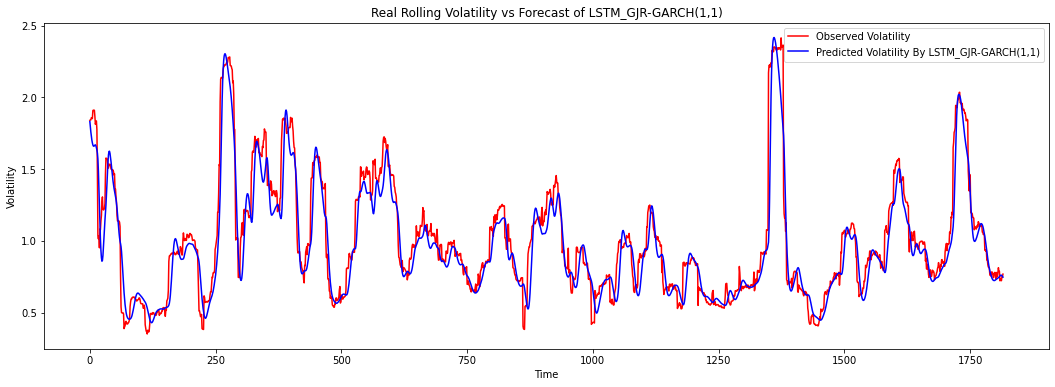

Root Mean Squared Error of the model is calculated as  0.5602874824910546


In [12]:


# ## Neural-Garch Model (Combining Garch(1,1) and LSTM)



training_set = df.iloc[:, 10:12].values
# Create a data structure with 100 timestep and 1 output
X_train = []
y_train = []
for i in range(300, df.shape[0]):
    X_train.append(training_set[i-300:i,:])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))     ##Did 1 instead of 2


# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], 2))) #,1 instead of ,2 in the end)
regressor.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.1))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)


regressor.save('my_modelp2.h5')



from keras.models import load_model
regressor = load_model('my_modelp2.h5')


predicted_stock_price = regressor.predict(X_train)


# Visualising the results
plt.figure(figsize=(18,6))
plt.plot(df.iloc[300:, 10:11].values, color = 'red', label = 'Observed Volatility')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Volatility By LSTM_GJR-GARCH(1,1)')
plt.title('Real Rolling Volatility vs Forecast of LSTM_GJR-GARCH(1,1)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()


skor3 = rmse_tr(predicted_stock_price, np.array(df.loc[df.index[300:], 'Volatility']))
print("Root Mean Squared Error of the model is calculated as ",skor3)
